In [28]:
library(tidyverse)
library(gridExtra)

### Linear Regression - Part 1

* Frequently-used statistical technique in marine ecology
  * Used for simple relationships or as a component of more complex models.

* Regression: a type of statical analysis where we desire to understand the relationship between a set of independent variables and their effect on a dependent variable

 * In machine learning, regression refers to predicting a continuous numerical outcome using a collection of input variables. 

* `Outcome`: can also be referred to as dependent variables, response (responding) variable, regressand, predicted variable, explained variable, outcome (output) variable.

* `Independent` variables: can be referred to as feature, predictor variable, regressor, covariate, explanatory variable, risk factor (see medical statistics)


### Linear Regression - Cont'd

* Regression is a common in marine bio and used in many different contexts in aquatic ecology. For example:
 * Species-area relationship 
 * Relationship between population density and body size of benthic invertebrate species
 * Characterization of spatial patterning 
 *  e.g. suspension-feeding, population dynamics, metabolic scaling

* Most commonly used to model data that is graphically characterized by a straight line
  * May also be used to model certain curvilinear relationships

### Topics to be covered

* Objectives of linear regression
* Understand how the model works
* What do the model parameters mean
* What are the assumptions of linear regression


### Objectives of Linear Regression

* Explain the contributions of a variable to an outcome

* Predicting an outcome (dependent) variable from a set of independent variables
  What do we expect the animal's weight to be given its length and girth?
  *  Used for $x-$values within or outside the range of observed values

### First Model assumption

*  We assume an approximately linear relationship between $X$ and $y$
  * Using a linear regression is, as we'll see, a violation of the model assumption when the data is non-linear

* Starting with a simple linear regression
  * A single independent variable ($x$) to predict a single dependent variable ($y$)

- Remember that the equation of a line is:

$$
    Y = \beta_0 + \beta_1 ~ X,
$$

* Where: 
  * $\beta_0$ the intercept
  * $\beta_1$ the slope


In [29]:
x = seq(from = -2, to = 10, by = 0.5)
x

[1] -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
[16]  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5 10.0

In [30]:
y = 2*x +3
y

[1] -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

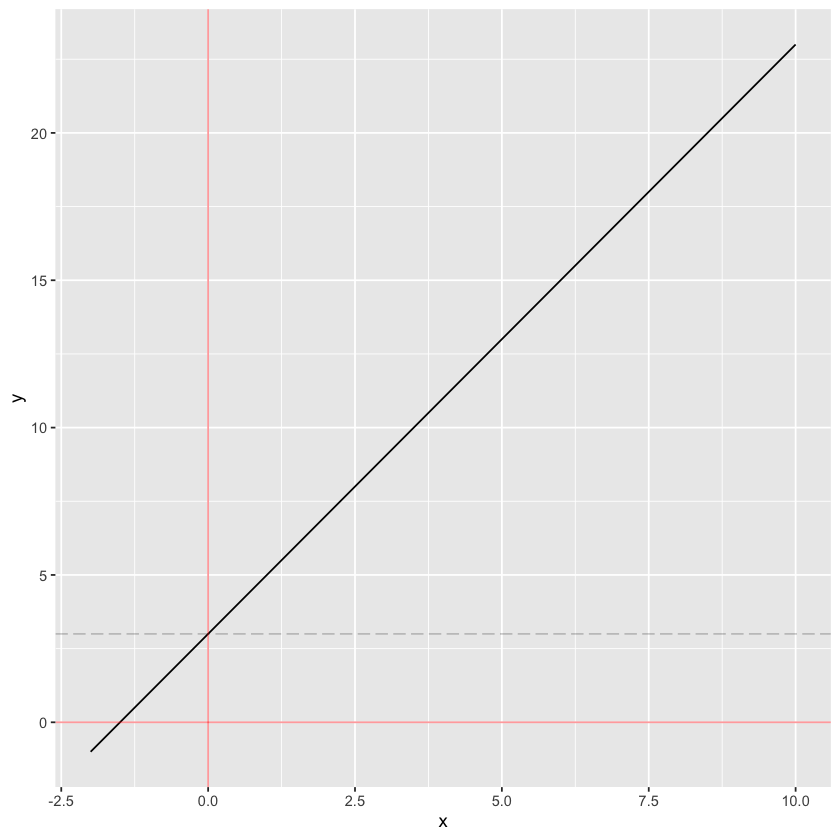

In [31]:
ggplot()+
  geom_line(mapping=aes(x=x, y=y))+
  geom_hline(aes(yintercept=0), alpha=0.4, color = 'red') +
  geom_vline(aes(xintercept=0), alpha=0.4, color = 'red') + 
  geom_hline(aes(yintercept=3), linetype = "longdash", alpha=0.2)


In [32]:
### Sample dataset

weight_data = read_csv("data/weights_by_len_width.csv", 
                col_types = cols(animal_length=col_double(), animal_width = col_double(), k= col_double(), animal_weight = col_double())
               )

head(weight_data)

animal_length,animal_width,k,animal_weight_1,animal_weight_2,animal_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.0,8.240069,35.07514,47.82940,56.50723,224.1355
10.5,5.489389,104.56268,49.59329,34.97515,136.6619
11.0,7.554987,59.40345,43.64608,70.08234,135.7336
11.5,8.645220,84.22470,53.12284,43.27694,148.4344
12.0,6.507570,85.34588,47.69944,58.42064,166.7231
12.5,12.632370,67.58020,53.39637,48.10218,182.5331


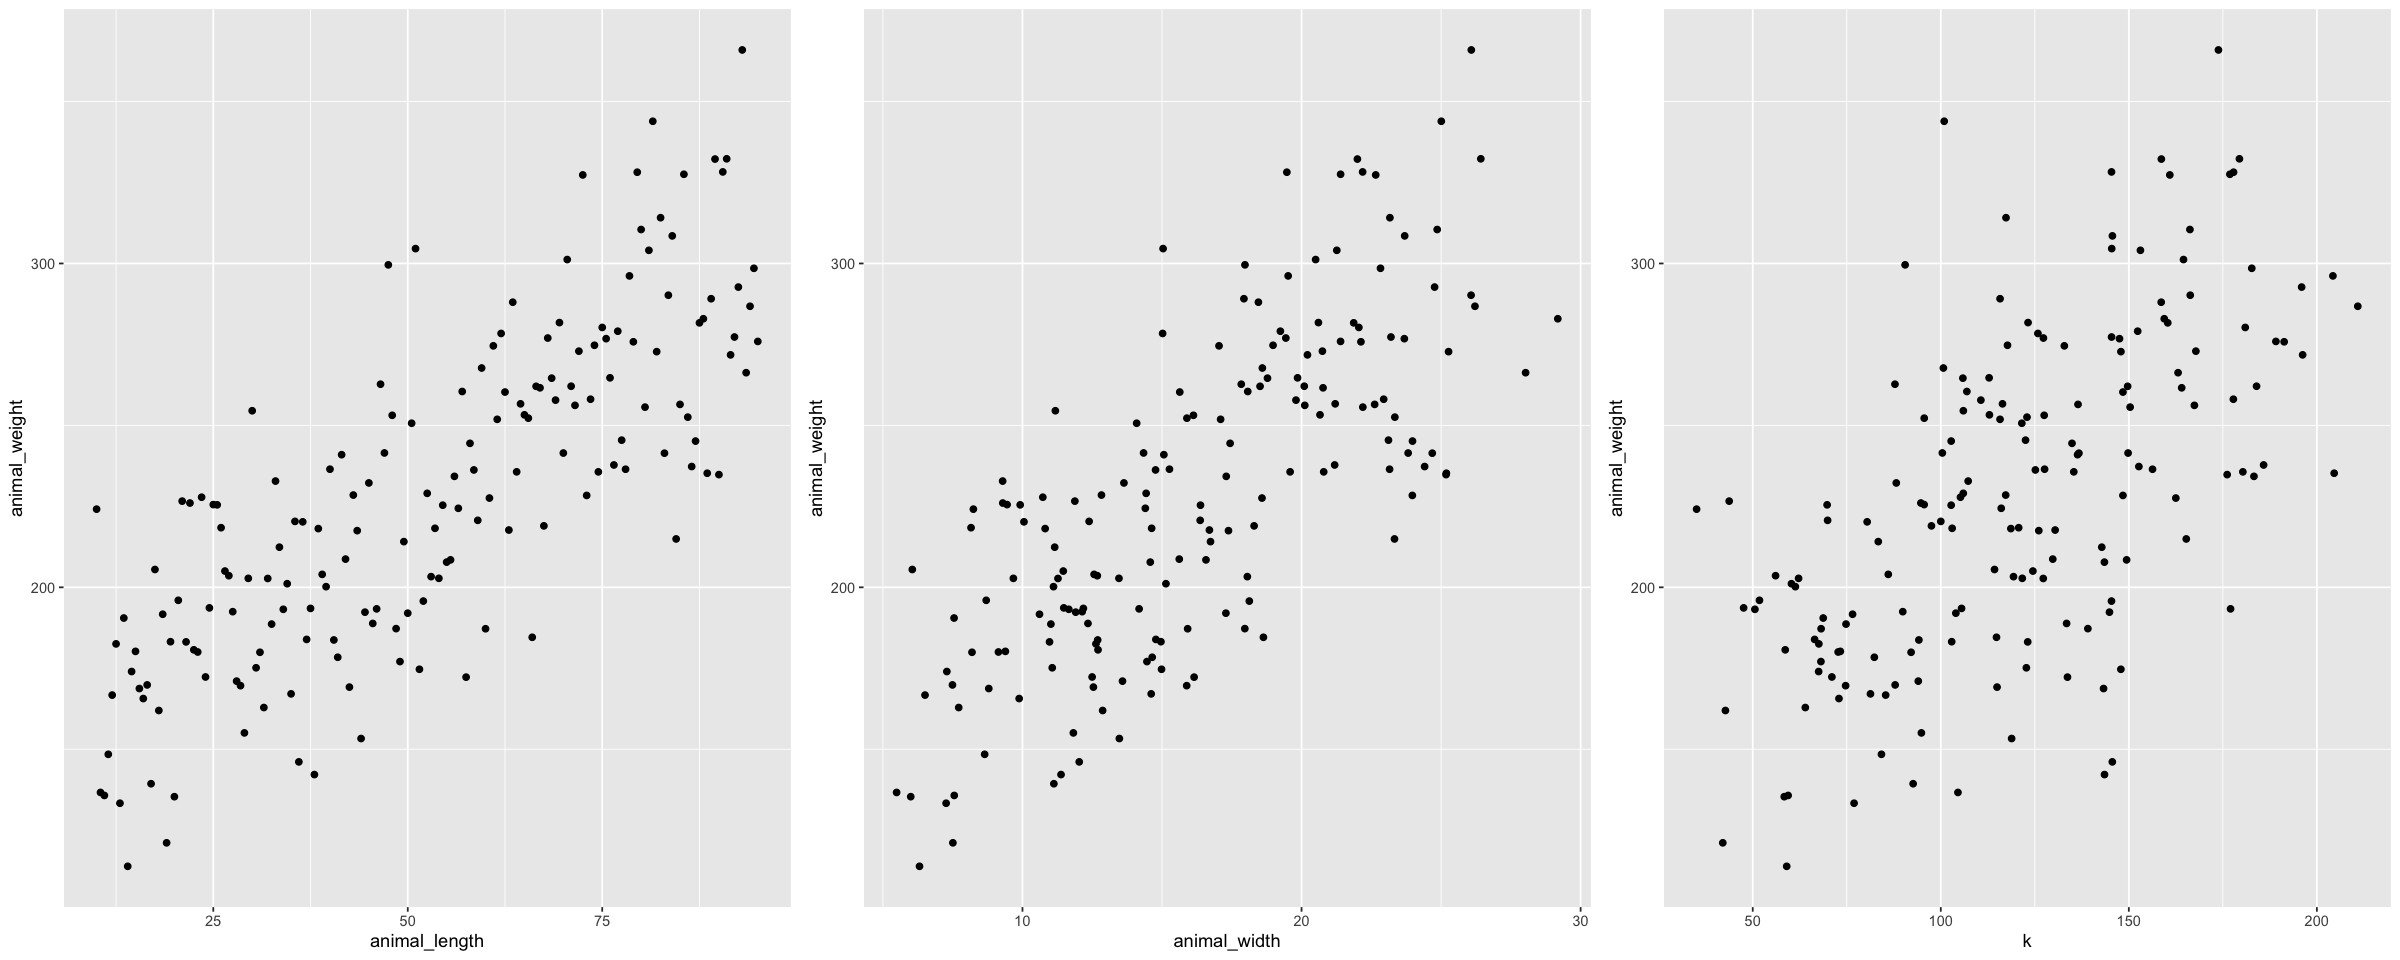

In [33]:
# library(gridExtra)
options(repr.plot.width=20, repr.plot.height=8)

plot_1 <- ggplot(weight_data) +
  geom_point(aes(x=animal_length, y=animal_weight))


plot_2 <- ggplot(weight_data) +
  geom_point(aes(x=animal_width, y=animal_weight))


plot_3 <- ggplot(weight_data) +
  geom_point(aes(x=k, y=animal_weight))

grid.arrange(plot_1, plot_2, plot_3, nrow=1)

### Modeling the Data

* Here, modeling the data simply means find the line that best fits the data
  * In general, a model refers to the abstraction that can be used to summarize or describe the data

* We need to find an abstraction of the type:
  $weight \approx \beta_0 + \beta_1 * length$

* Together, $\beta_0$ and $\beta_1$ are known as the model parameters
  * a model's parameters are the values that describe the model
* Here, we can have an infinite number of intercepts and slopes
  * There is an infinite number of possible models

* Which line best represents the data?

### Modeling the Data
* The data
![](https://www.dropbox.com/s/ugx6olqquvn49i8/data_plot.png?dl=1)
* The data and the model
![](https://www.dropbox.com/s/b3ijojd8sq7l747/line_regression_line.png?dl=1)

### Predicting a Value

![](https://www.dropbox.com/s/wlmeljxdkltwgnu/prediction.png?dl=1)


### The Quality of the Regression: Model Error

* In this model, the error is the difference between the predicted value and the actual value
  * Intuitive... a perfect model is one that passes through (predicts without error) all the values.

* If  $\hat{y}_i = \beta_0 + \beta_1 x_i$, then the error for $i^{th}$ data point is $e_i = \hat{y}_i - y_i$

![](https://www.dropbox.com/s/mdvaovrob9bgrc0/error.png?dl=1)

### The Model Fit

* Why doesn't the line pass by all the points
  * Ideally, if a perfect fit then we should be able to effectively predict our data

* The resulting model merely describes the outcome variable using the independent variables
  * The quality of fits depends on many factors, including the quality of the predictors

*  An unknown number of uncontrolled variables other than the independent variable can influence the dependent variable, 
  * e.g. individual variations in physiology * conditions and handling time of individual samples, etc.

* We often cannot identify all the independent variables and/or measure their magnitude

* The independent variables may influence the outcome in either:
  * Additive fashion (i.e. add their unknown positive or negative values to the linear equation) 
  * Multiplicative fashion: add their product to the linear equation


### Error Term

* The unknown variable contributions are grouped under  the term $\epsilon$
  * It's called the error term

* The linear model is thus written as:
$$
Y = \beta_0 + \beta_1 \times X_1 + \epsilon 
$$
  * This is the mathematical way of quantifying the other real-world effects on the dependent variable 






### Linear Regression: the Complete Model

$$
Y = \beta_0 + \beta_1 \times X_1 + \epsilon 
$$


* $Y$:  is the dependent or outcome variable
* $X_1$: is the independent or explanatory variable
* $\beta_0$ and $\beta_1$: the parameters of the regression model
  * $\beta_0$: the $y$-intercept; i.e. for values of $x=0$, the value of $y$ is $\beta_0$
    * does not have concrete meaning in situations where $x$ cannot be zero (e.g. animal weight)
  rarely
  * $\beta_1$: the regression coefficient (aka slope of the regression line). 
    * The __mean__ change in the dependent variable for one unit of change of the independent variable.
* $error$: the error term represents the variation in $Y$ that cannot be explained by the variation in $X$. 


### The Quality of the Regression: Model Error

* In this model, the error is the difference between the predicted value and the actual value
  * Intuitive... a perfect model is one that passes through (predicts without error) all the values.

* If  $\hat{y}_i = \beta_0 + \beta_1 x_i$, then the error for $i^{th}$ data point is $e_i = \hat{y}_i - y_i$

![](https://www.dropbox.com/s/mdvaovrob9bgrc0/error.png?dl=1)

### About the Error

* Residuals are estimates of the true population error 
  * Similar to how a sample's standard deviation is used to reflect the population standard deviation
  * Error and residuals are used interchangeably

* Intuitively, the same biases should apply regardless of the values of X.
  * E.g.: The error estimate is the same whether the fit is small or big


### Minimizing the Error

* The overall model error can thus be computed simply as the sum of all errors.

![](https://www.dropbox.com/s/sea80g5sgktjcal/error_all_points.png?dl=1)

* One strategy for selecting a model is to pick the one that has the smallest total total sum of residuals
  * Explains as much of the model as possible


### The Model Error and the Residual Sum of Squares

* We can quantify how well a line fits the data simply by assessing the total error 
  * To prevent error values from cancelling out, we compute the square of the error
* We call that the residual sum of squares (RSS)

$$
RSS = e_1^2 + e_2^2 + ... + e_n^2
$$


<img src="https://www.dropbox.com/s/rmatv5vx7d4rdb1/RSS_Examples.png?dl=1" alt="drawing" style="width:900px;"/>


### 2nd Model assumption

* Residuals should be randomly distributed
  * A very important assumption, which if ignored, can yield a poor fit 
  *  The analysis of residuals is a very important, yet often neglected part of linear regression. 

* If the error is much bigger for big fish than small fish, then linear regression cannot apply
  * At least not without pre-processing the data


In [34]:
lm_model = lm(animal_weight~animal_length, data = weight_data)
summary(lm_model)


Call:
lm(formula = animal_weight ~ animal_length, data = weight_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.198 -24.281   0.485  18.504  79.442 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   144.03319    5.61886   25.63   <2e-16 ***
animal_length   1.60207    0.09686   16.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.26 on 169 degrees of freedom
Multiple R-squared:  0.6182,	Adjusted R-squared:  0.6159 
F-statistic: 273.6 on 1 and 169 DF,  p-value: < 2.2e-16


In [35]:
lm_model$coefficients

(Intercept) animal_length 
    144.03319       1.60207

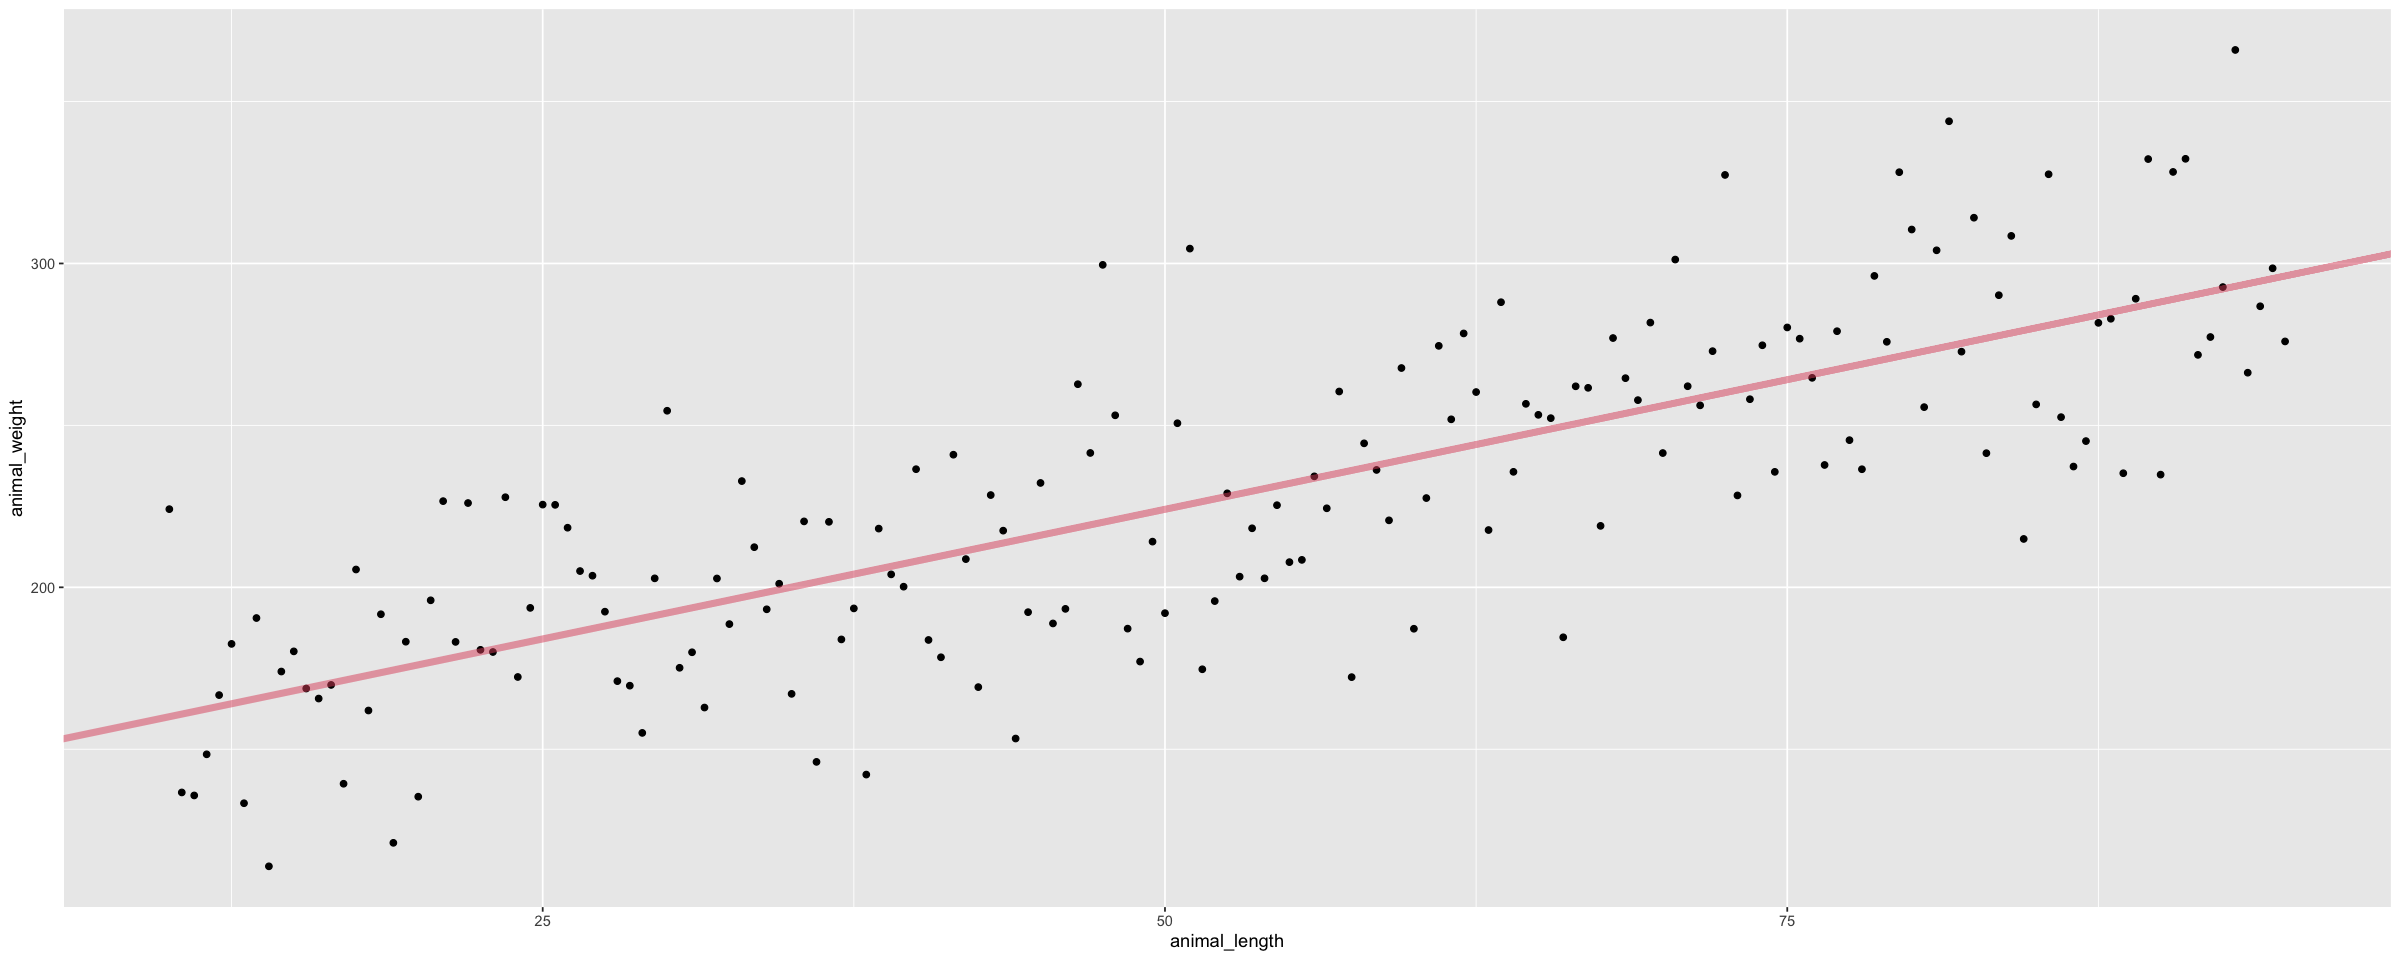

In [36]:
ggplot(weight_data) +
  geom_point(aes(x=animal_length, y=animal_weight)) + 
  geom_abline(intercept = lm_model$coefficients[1], slope = lm_model$coefficients[2], color = 2, size=2, alpha=0.5)

### Multiple Linear Regression

* How can we leverage other variables to predict weight?
  * The assumption, additional variables may help better predict the outcome

* Naive solution: Build independent regression and combine the results.
    
* Problems with the naive solution
  * Not completely clear how to combine the data
    * Minimum or mean, median, etc.? why?
  * Each feature ignores the effect of the other features
    * Does not account for interactions
    


In [37]:
lm_model_length = lm(animal_weight~animal_length , data = weight_data)
summary(lm_model_length)


Call:
lm(formula = animal_weight ~ animal_length, data = weight_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.198 -24.281   0.485  18.504  79.442 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   144.03319    5.61886   25.63   <2e-16 ***
animal_length   1.60207    0.09686   16.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.26 on 169 degrees of freedom
Multiple R-squared:  0.6182,	Adjusted R-squared:  0.6159 
F-statistic: 273.6 on 1 and 169 DF,  p-value: < 2.2e-16


In [38]:
lm_model_width = lm(animal_weight~animal_width, data = weight_data)
summary(lm_model_width)


Call:
lm(formula = animal_weight ~ animal_width, data = weight_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.578 -23.547  -0.442  23.504  84.517 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  117.7044     7.9226   14.86   <2e-16 ***
animal_width   6.8069     0.4621   14.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.48 on 169 degrees of freedom
Multiple R-squared:  0.5621,	Adjusted R-squared:  0.5595 
F-statistic:   217 on 1 and 169 DF,  p-value: < 2.2e-16


In [39]:
lm_model_k = lm(animal_weight~k , data = weight_data)
summary(lm_model_k)


Call:
lm(formula = animal_weight ~ k, data = weight_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.644  -26.706    0.707   26.770  130.087 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 138.07997    9.80649  14.080   <2e-16 ***
k             0.75066    0.07754   9.681   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.57 on 169 degrees of freedom
Multiple R-squared:  0.3567,	Adjusted R-squared:  0.3529 
F-statistic: 93.73 on 1 and 169 DF,  p-value: < 2.2e-16


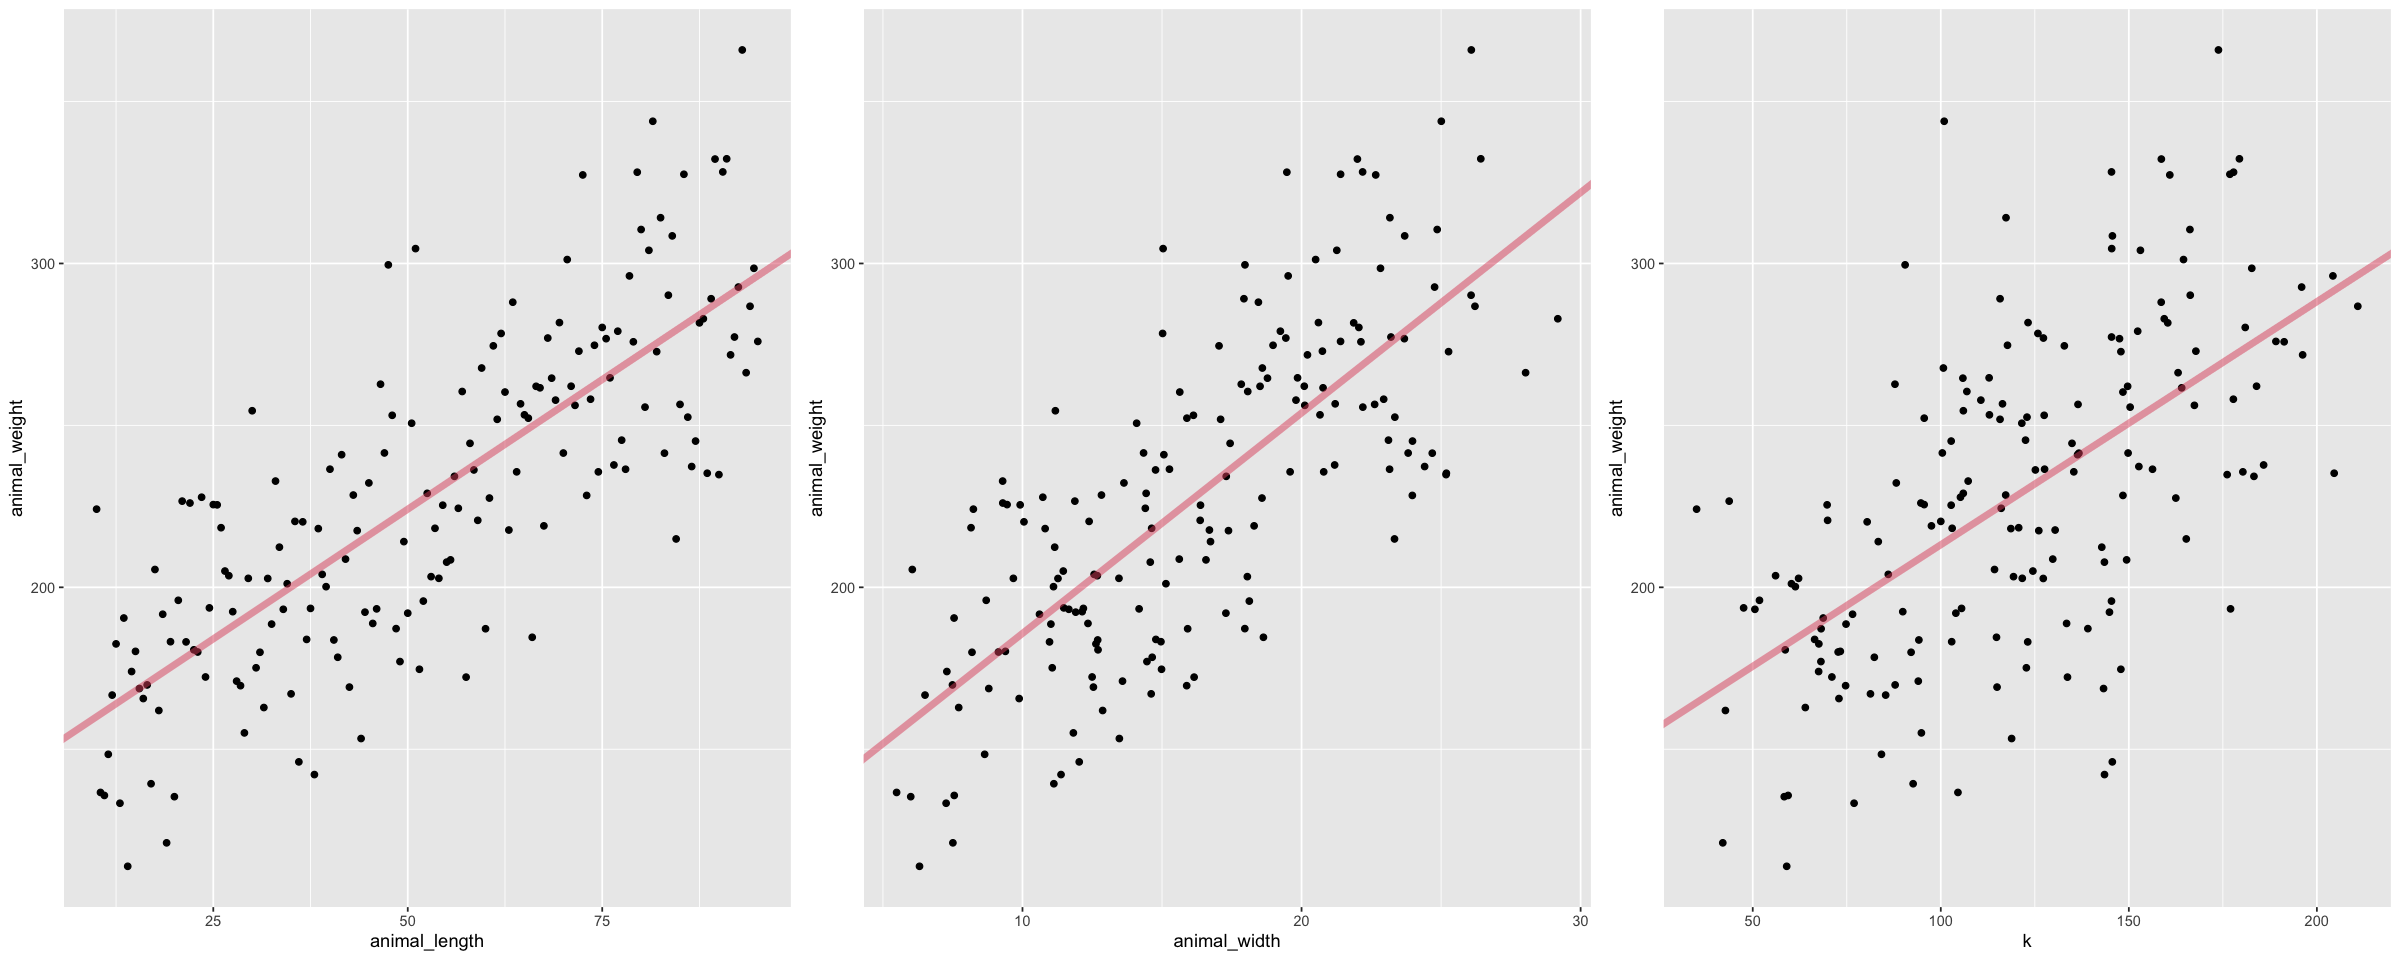

In [40]:

plot_1 = ggplot(weight_data) +
  geom_point(aes(x=animal_length, y=animal_weight)) +
  geom_abline(intercept = lm_model_length$coefficients[1], slope = lm_model_length$coefficients[2], color = 2, size=2, alpha=0.5)

plot_2 =  ggplot(weight_data) + 
  geom_point(aes(x=animal_width, y=animal_weight)) + 
  geom_abline(intercept = lm_model_width$coefficients[1], slope = lm_model_width$coefficients[2], color = 2, size=2, alpha=0.5)

plot_3 =  ggplot(weight_data) + 
  geom_point(aes(x=k, y=animal_weight)) + 
  geom_abline(intercept = lm_model_k$coefficients[1], slope = lm_model_k$coefficients[2], color = 2, size=2, alpha=0.5)

grid.arrange(plot_1, plot_2, plot_3, nrow=1)

### Multiple Linear Regression


* We re-write our linear regression equation to account for all (or some if desired) independent variables

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon,
$$

* Where:
  * $p$ is the number of params (variables in the model)
  * $\beta_j$ is the mean effect on y for a unit increase in the predictor $x_i$, holding all the other values constant
  

* We an use stats model to compute the parms of the new model:

$$
\text{aimal_weight} = \beta_0 ~~+~~ \beta_1 \times \text{animal_length} ~~+~~ \beta_2 \times \text{animal_width} ~~+~~\beta_3 \times \text{k} ~~+~~ \epsilon,
$$



### Model Parameter Estimation 


* The rule (function, method, or algorithm) used to calculate the regression equation from the observed data is
called the estimator. 
          
* OLS estimator is one of the common estimators used to estimate the parameters of a linear regression
  * Various other estimators
  * OLS is often used with linear regression.
  
* Minimizes the sum of squared residuals. 
  * uses calculus and derivatives to derive values that minimize the RSS

<img src="https://www.dropbox.com/s/wg3r2z7vfredtxh/curve.png?dl=1" alt="drawing" style="width:1000px;"/>


In [41]:
mlm = lm(animal_weight~ animal_length + animal_width + k, weight_data)
summary(mlm)


Call:
lm(formula = animal_weight ~ animal_length + animal_width + k, 
    data = weight_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.119 -23.829  -0.219  19.299  79.156 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   136.44502    9.85781  13.841  < 2e-16 ***
animal_length   1.32609    0.29037   4.567 9.57e-06 ***
animal_width    1.16766    1.19586   0.976    0.330    
k               0.02611    0.09031   0.289    0.773    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.35 on 167 degrees of freedom
Multiple R-squared:  0.6205,	Adjusted R-squared:  0.6137 
F-statistic: 91.02 on 3 and 167 DF,  p-value: < 2.2e-16


### Model Parameter Estimation - Cont'd

* In the model above, only animal_length is a relevant predictor

  * Only variabel with a significant p-value

 

* It turns out that in this sample dataset:

  * $k$ is correlated with animal_length. So, knowing one is sufficient for predicting the weight

  * Animal_width does not contribute any additional insight once the contribution of animal_length has been subtracted


In [42]:
# k and animal_length are highly correlated
cor(weight_data$animal_length, weight_data$k)

[1] 0.7482453

In [56]:
# computing the residuals with animal_length as a model
predicted_weight_with_length = lm_model_length$coefficients[1] + weight_data$animal_length * lm_model_length$coefficients[2]
residuals_width_length = weight_data$animal_weight - predicted_weight_with_length 

predicted_weight_with_length[0:3]
residuals_width_length[0:3]


[1] 160.0539 160.8549 161.6560

[1]  64.08164 -24.19299 -25.92241

In [55]:
names(lm_model_length)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [58]:
lm_model_length$residuals[0:3]

1         2         3 
 64.08164 -24.19299 -25.92241

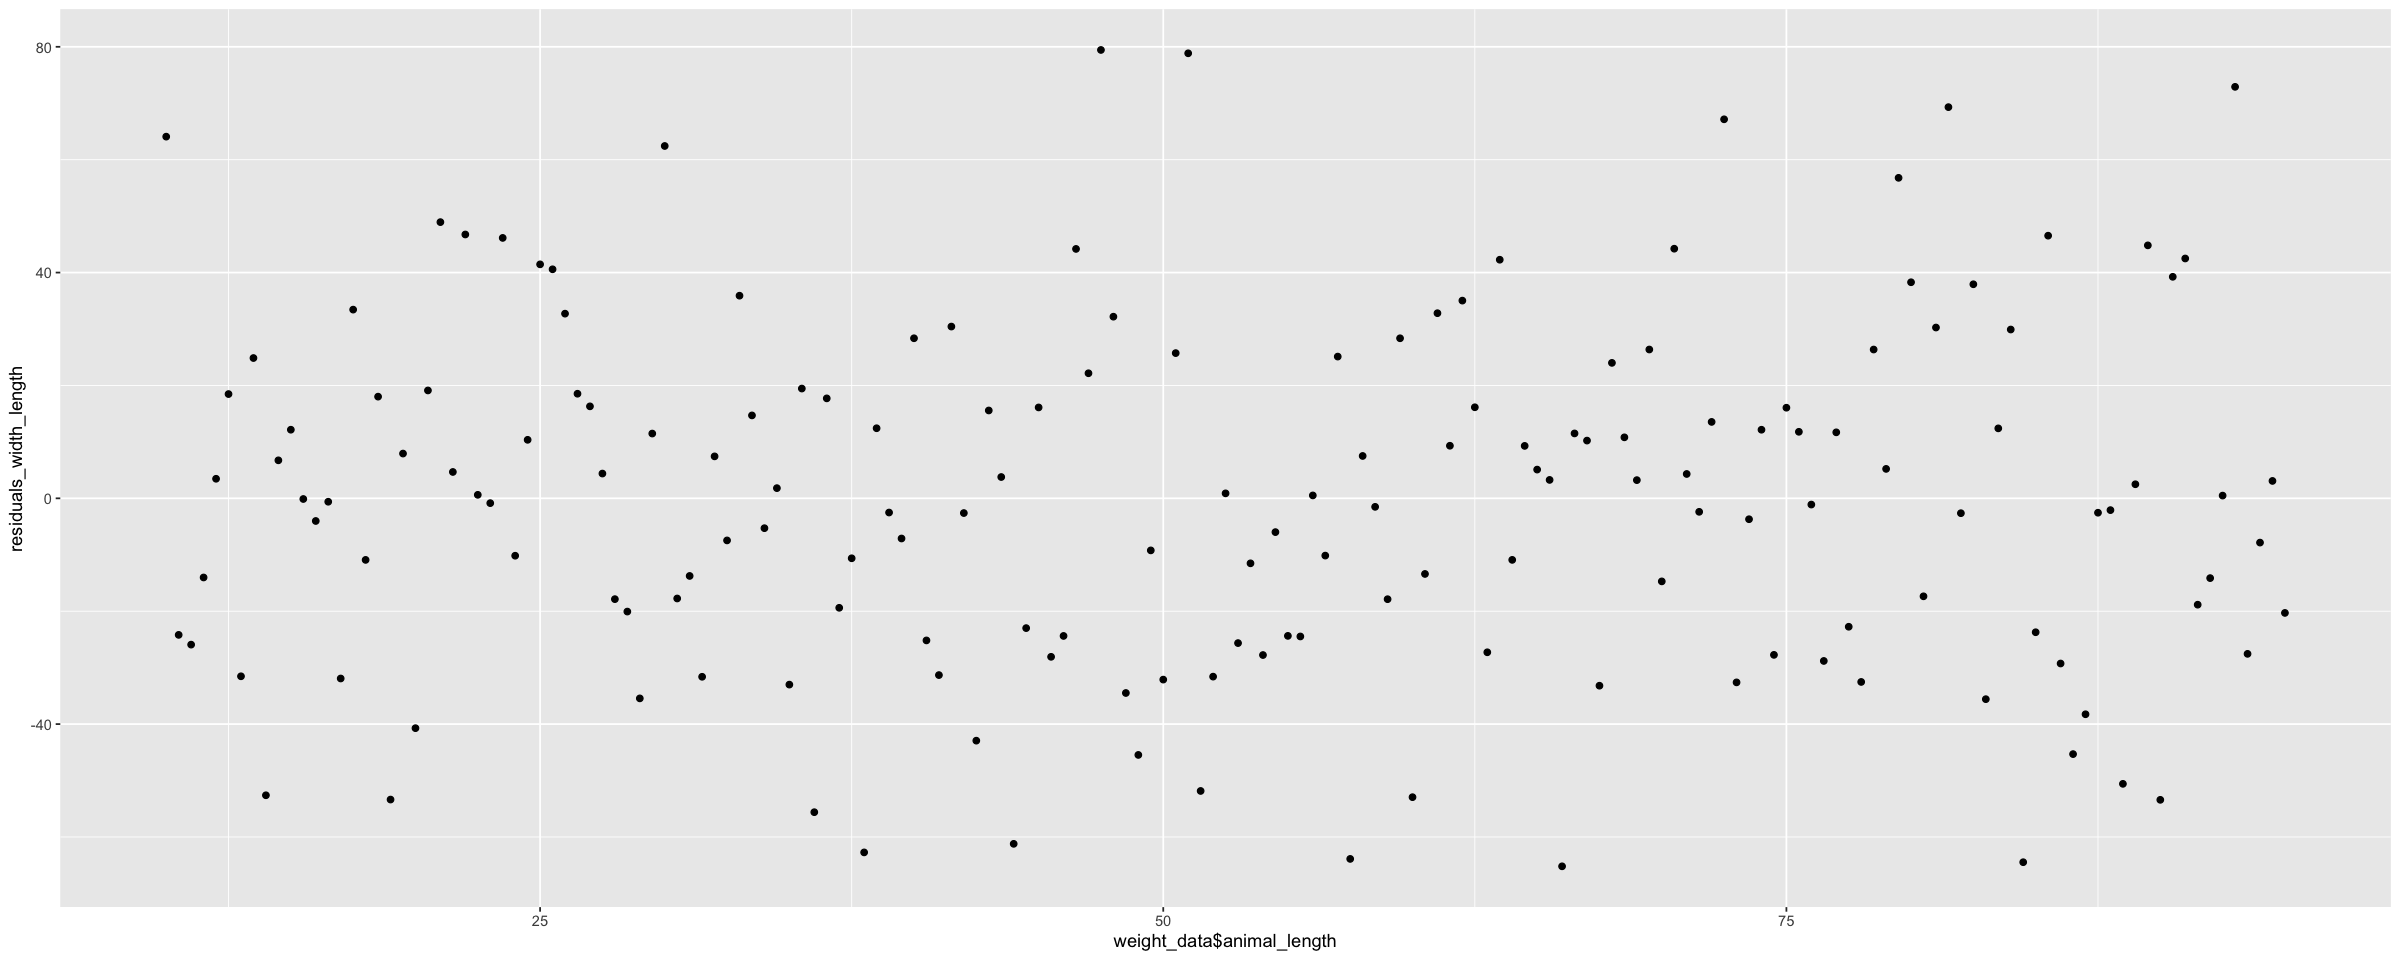

In [44]:
ggplot() + 
  geom_point(aes(x=weight_data$animal_length, y=residuals_width_length))


### Conditions for the Proper OLS

1. Linearity of the parameters. 

2. Two independent variables of the model should not be related by a linear relationship
  * Two independent or explanatory variables are perfectly collinear when they are intrinsically related by a linear relationship, and we can approximate the value of one variable if we know the value of another
  * One of the variables is therefore redundant and must be removed  



### Conditions for the Proper OLS

3. Correlation between the independent variables and the error term
  * The ‘Zero conditional mean’ assumption,
  * all of the independent variables should be uncorrelated with the error term. 
  * If $\epsilon$ changes with the independent variable $X$, then variation $Y$ is influenced by $X$  and $\epsilon$ 
  * Such a correlation will result in biased estimates of the regression coefficient.



### Conditions for the Proper OLS - Cont'd

4. Homoscedasticity
  * The variance of errors is the same for all values of the independent variable.
  * Heteroscedasticity is frequently encountered in data collected at one point in time.
    * marine organisms often have an aggregated rather than a random, spatial distribution, sexual dimorphism, subpopulation differences, etc.
  * So, the error term needs to be normally distributed with a constant variance
    * The outcome variable does not need to be normally distributed
    

![](https://www.dropbox.com/s/481q5hk5uh6kw5a/residuals_homoskedasticity.png?dl=1)

### Validation of the Regression Model

* Model validation is the most important step
 * You can apply a linear model to absolutely anything and it would still provide a slope and an intercept

* $R^2$ is one of the main benchmarks used to assess the goodness of fit of the regression model.
 * how close the data are to the fitted regression line 

 

### About the Correlation


* In the absence of any other information about the data, the mean is a good predictor of the response variable

![](https://www.dropbox.com/s/w2finua9iyox1m2/predicting_with_average.png?dl=1)

* Therefore, when trying to estimate the quality of a regression model, we can compare it the prediction in the absence of any data


### Mean vs. Regression Residuals - Cont'd

* $R^2$ quantifies the difference between the best fitting line (the one that minimizes the residuals) and the mean line

 
<img src="https://www.dropbox.com/s/2y75vjsya5xtkzt/mean_vs_reg_residuals_2.png?dl=1" alt="drawing" style="width:1000px;"/>

* Difference between the variance around the mean line and the variance around the red line, normalized by the variance around the mean line

* We normalize by $\sigma^2_{mean\_line}$ so that the $R^2$ is constrained to the interval [0,1]

  * $\sigma^2_{red\_line}$ will never be greater than $\sigma^2_{mean\_line}$ 

### Limitations of the R2

* $R^2$ can be high even if the necessary assumptions are not respected

 * it's critical to assess that the assumptions are valid before reporting the data

* $R^2$ Increases with the addition of any independent variable
  * The more variables are included, the higher the $R^2$, regardless of whether the variables contributed to predicting the outcome variable
  * More appropriate value is the adjusted $R^2$, which takes into account not only the goodness of fit of the model but also the number of the predictors
  * adding more predictors will decrease the adjusted $R^2$
* One can compute the $p$-value for the parameters. For example:
  * Null: slope = 0
  * Alternative: slope != 0
  * Generate slope values using subsamples of the data and compare the observed value against the null
  * The t-test does something similar based on a t-score ($t=b_1/SE$)


In [246]:
mlm = lm(animal_weight~ animal_length + animal_width + k, weight_data)
summary(mlm)


Call:
lm(formula = animal_weight ~ animal_length + animal_width + k, 
    data = weight_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.119 -23.829  -0.219  19.299  79.156 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   136.44502    9.85781  13.841  < 2e-16 ***
animal_length   1.32609    0.29037   4.567 9.57e-06 ***
animal_width    1.16766    1.19586   0.976    0.330    
k               0.02611    0.09031   0.289    0.773    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.35 on 167 degrees of freedom
Multiple R-squared:  0.6205,	Adjusted R-squared:  0.6137 
F-statistic: 91.02 on 3 and 167 DF,  p-value: < 2.2e-16


In [247]:
mlm = lm(animal_weight~ animal_length)
summary(mlm)


Call:
lm(formula = animal_weight ~ animal_length)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.198 -24.281   0.485  18.504  79.442 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   144.03319    5.61886   25.63   <2e-16 ***
animal_length   1.60207    0.09686   16.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.26 on 169 degrees of freedom
Multiple R-squared:  0.6182,	Adjusted R-squared:  0.6159 
F-statistic: 273.6 on 1 and 169 DF,  p-value: < 2.2e-16
